___
# Import Library
___

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio

import folium
from branca import colormap as cm

import sqlalchemy as db
import os
from dotenv import load_dotenv
from geopy.geocoders import Nominatim

import itertools
import io
from PIL import Image

In [2]:
pd.options.display.max_columns = 500

In [3]:
load_dotenv()

True

In [4]:
init_notebook_mode(connected=True)

In [5]:
def save_img(m, filename):
    img_data = m._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    img.save(filename)

In [25]:
PATH = 'Dashboard/Airbnb/static/assets/img/portfolio/'

___
# Business Problems
___

Who doesn't like to travel? Traveling is a such fun activity, coming into new place and experience many new things. It is a part of crucial aspect in life as it's the best way to escape from hectic and busy schedule. It also improves the mental and physical health while it's a good remedy for stress, anxiety and depression. As part of travelling, deciding accomodation or where you should sleep and charge your body is definitely important thing to decide. One of the choice to spend your night, apart from conventional hotel is Airbnb.

Airbnb is an American vacation rental online marketplace company based in San Francisco, California. Airbnb maintains and hosts a marketplace, accessible to consumers on its website or via an app. Through the service, users can arrange lodging, primarily homestays, and tourism experiences or list their properties for rental. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. 

Singapore, one of developed country in Asia, make 4.1% of its national GDP from tourism industry alone and has been one of the most visited country in Asia resulting in thousand of Airbnb listings in Singapore (around 4000+ listings). It can be troublesome to choose one befitting your needs and budget. This also becomes problem for owner property who wants to register their new property in Airbnb since they may find it hard to price their property.

Here's where machine learning help to solve those problems. Predicting price of property, or in this case Airbnb listing, could be quite challenging since there are various factors need to be measured and calculated in order to get price accurately. In this project, we will do end-to-end machine learning project, starting from cleaning the dataset, do exploratory data analysis to get some insights, use machine learning model to predict Airbnb listing price and deploy our best model by creating dashboard.   

___
# Load Datasets
___

In [7]:
engine = db.create_engine(os.getenv('db-uri'))

In [8]:
meta = db.MetaData()
meta.reflect(engine)

In [9]:
df_dict = dict()

In [10]:
with engine.connect() as con:
    for table in meta.tables.keys():
        query = db.select([meta.tables[table]])
        all_data = con.execute(query).fetchall()
        df_dict[table] = pd.DataFrame(all_data, columns=meta.tables[table].c.keys())

In [11]:
for key in df_dict:
    display(key)
    display(df_dict[key].head())

'calendar'

listing_id       date  available  price  adjusted_price  minimum_nights  \
0     1678754 2020-12-30      False    257             257             1.0   
1     4450681 2021-01-02       True    320             320             7.0   
2     4450681 2021-01-03       True    320             320             7.0   
3     4450681 2021-01-04       True    320             320             7.0   
4     4450681 2021-01-05       True    200             200             7.0   

   maximum_nights  
0            30.0  
1           999.0  
2           999.0  
3           999.0  
4           999.0

'reviews'

listing_id        id       date  reviewer_id reviewer_name  \
0       49091   8243238 2013-10-21      8557223         Jared   
1       50646  11909864 2014-04-18      1356099         James   
2       50646  13823948 2014-06-05     15222393         Welli   
3       50646  15117222 2014-07-02      5543172         Cyril   
4       50646  15426462 2014-07-08       817532          Jake   

                                            comments  
0  Fran was absolutely gracious and welcoming. Ma...  
1  A comfortable room in a smart condo developmen...  
2  Stayed over at Sujatha's house for 3 good nigh...  
3  It's been a lovely stay at Sujatha's. The room...  
4  We had a great experience. A nice place, an am...

'neighbourhood'

neighbourhood_group  neighbourhood
0      Central Region         Bishan
1      Central Region    Bukit Merah
2      Central Region    Bukit Timah
3      Central Region  Downtown Core
4      Central Region        Geylang

'listings'

id                         listing_url  \
0  49091  https://www.airbnb.com/rooms/49091   
1  50646  https://www.airbnb.com/rooms/50646   
2  56334  https://www.airbnb.com/rooms/56334   
3  71609  https://www.airbnb.com/rooms/71609   
4  71896  https://www.airbnb.com/rooms/71896   

                                  name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   
1      Pleasant Room along Bukit Timah   
2                          COZICOMFORT   
3  Ensuite Room (Room 1 & 2) near EXPO   
4      B&B  Room 1 near Airport & EXPO   

                                         description  \
0  <b>The space</b><br />This is Room No. 2.(avai...   
1  Fully furnished bedroom with a nice view on th...   
2  <b>The space</b><br />This is Room no. 1. USD7...   
3  For 3 rooms.Book room 1&2 and room 4<br /><br ...   
4  <b>The space</b><br />Vocational Stay Deluxe B...   

                               neighborhood_overview  \
0                                               None   
1  The serenity & quiet surrounding makes it an i...   
2                                               None   
3                                               None   
4                                               None   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/24485541/67b0...   266763   
1  https://a0.muscache.com/pictures/36342984/670d...   227796   
2  https://a0.muscache.com/pictures/20783922/1966...   266763   
3  https://a0.muscache.com/pictures/24453191/3580...   367042   
4  https://a0.muscache.com/pictures/2440674/ac4f4...   367042   

                                   host_url  host_name host_since  \
0  https://www.airbnb.com/users/show/266763  Francesca 2010-10-20   
1  https://www.airbnb.com/users/show/227796    Sujatha 2010-09-08   
2  https://www.airbnb.com/users/show/266763  Francesca 2010-10-20   
3  https://www.airbnb.com/users/show/367042    Belinda 2011-01-29   
4  https://www.airbnb.com/users/show/367042    Belinda 2011-01-29   

          host_location                                         host_about  \
0             Singapore  I am a private tutor by profession. My husband...   
1  Singapore, Singapore  I am a working professional, living in Singapo...   
2             Singapore  I am a private tutor by profession. My husband...   
3             Singapore  Hi My name is Belinda -Housekeeper \r\n\r\nI w...   
4             Singapore  Hi My name is Belinda -Housekeeper \r\n\r\nI w...   

   host_response_time  host_response_rate  host_acceptance_rate  \
0        within a day               100.0                   NaN   
1  a few days or more                 0.0                   NaN   
2        within a day               100.0                   NaN   
3  within a few hours               100.0                 100.0   
4  within a few hours               100.0                 100.0   

  host_is_superhost                                 host_thumbnail_url  \
0             False  https://a0.muscache.com/im/pictures/user/2628b...   
1             False  https://a0.muscache.com/im/pictures/user/8fd2c...   
2             False  https://a0.muscache.com/im/pictures/user/2628b...   
3             False  https://a0.muscache.com/im/users/367042/profil...   
4             False  https://a0.muscache.com/im/users/367042/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/2628b...          Woodlands   
1  https://a0.muscache.com/im/pictures/user/8fd2c...        Bukit Timah   
2  https://a0.muscache.com/im/pictures/user/2628b...          Woodlands   
3  https://a0.muscache.com/im/users/367042/profil...           Tampines   
4  https://a0.muscache.com/im/users/367042/profil...           Tampines   

   host_listings_count  host_total_listings_count  \
0                  2.0                        2.0   
1                  1.0                        1.0   
2                  2.0                        2.0   
3   

___
# Exploratory Data Analysis
___

## Univariate Analysis

### How is the price distribution of Singapore Airbnb?

In [12]:
fig = go.Figure()
fig.add_trace(
    go.Histogram(x=df_dict['listings']['price'])
)

fig.update_layout(
    title_text='Price Distributions',
    title_x=0.5,
    xaxis_title_text='Price',
    yaxis_title_text='Count',
)
fig.show()

In [29]:
pio.write_html(fig, PATH+'insight-1.html')

#### What is the maximum and minimum price of Singapore Airbnb listings?

In [30]:
df_dict['listings'][df_dict['listings']['price'] == df_dict['listings']['price'].max()]

id                            listing_url  \
1257  20791161  https://www.airbnb.com/rooms/20791161   

                                                 name  \
1257  YOUR entire PRIVATE LUXURY PENTHOUSE condo unit   

                                            description neighborhood_overview  \
1257  Gorgeous 2 rooms penthouse condominium unit lo...                  None   

                                            picture_url    host_id  \
1257  https://a0.muscache.com/pictures/8e1ffdbd-deb6...  122991242   

                                         host_url host_name host_since  \
1257  https://www.airbnb.com/users/show/122991242        Jj 2017-03-28   

     host_location                                         host_about  \
1257            SG  Hey there, I'm JJ Kenny.\r\nThanks for visitin...   

     host_response_time  host_response_rate  host_acceptance_rate  \
1257               None                 NaN                   NaN   

     host_is_superhost                                 host_thumbnail_url  \
1257             False  https://a0.muscache.com/im/pictures/user/006c7...   

                                       host_picture_url host_neighbourhood  \
1257  https://a0.muscache.com/im/pictures/user/006c7...               None   

      host_listings_count  host_total_listings_count  \
1257                  1.0                        1.0   

                                     host_verifications host_has_profile_pic  \
1257  ['email', 'phone', 'facebook', 'reviews', 'jum...                 True   

     host_identity_verified neighbourhood_cleansed  \
1257                   True                   Tuas   

     neighbourhood_group_cleansed  latitude  longitude       property_type  \
1257                  West Region     1.318  103.64687  Entire condominium   

            room_type  accommodates  bedrooms  beds  price  minimum_nights  \
1257  Entire home/apt             3       1.0   1.0  10286               2   

      maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
1257            1125                       2                       2   

      minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
1257                    1125                    1125                     2.0   

      maximum_nights_avg_ntm  has_availability  availability_30  \
1257                  1125.0              True               29   

      availability_60  availability_90  availability_365  number_of_reviews  \
1257               59               89                89                  5   

      number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
1257                      0                       0   2017-09-19  2017-10-31   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
1257                 100.0                    10.0                       10.0   

      review_scores_checkin  review_scores_communication  \
1257                   10.0                         10.0   

      review_scores_location  review_scores_value  instant_bookable  \
1257                    10.0                 10.0             False   

      calculated_host_listings_count  \
1257                               1   

      calculated_host_listings_count_entire_homes  \
1257                                            1   

      calculated_host_listings_count_private_rooms  \
1257                                             0   

      calculated_host_listings_count_shared_rooms  reviews_per_month  \
1257                                            0               0.12   

      total_bathrooms bathrooms_type  Air Conditioning  BBQ Utensils  \
1257              1.0           bath                 1             1   

      Baby and Children Equipments  Bathtub  Beach Essentials  Breakfast  \
1257                             0        0                 0          0   

      Building Staff  Cleaning Before Checkout  Cleaning Equipments  \
1257               1               

In [31]:
df_dict['listings'][df_dict['listings']['price'] == df_dict['listings']['price'].min()]

id                            listing_url name  \
1698  24849782  https://www.airbnb.com/rooms/24849782   TS   

                                            description  \
1698  For long-term lease. Minimum 6 months.<br /><b...   

       neighborhood_overview  \
1698  Quiet and Central area   

                                            picture_url    host_id  \
1698  https://a0.muscache.com/pictures/5fb30e50-28e4...  187844948   

                                         host_url host_name host_since  \
1698  https://www.airbnb.com/users/show/187844948       Ben 2018-05-04   

     host_location host_about  host_response_time  host_response_rate  \
1698            SG       None  a few days or more                 0.0   

      host_acceptance_rate host_is_superhost  \
1698                   NaN             False   

                                     host_thumbnail_url  \
1698  https://a0.muscache.com/im/pictures/user/c53c6...   

                                       host_picture_url host_neighbourhood  \
1698  https://a0.muscache.com/im/pictures/user/c53c6...         Ang Mo Kio   

      host_listings_count  host_total_listings_count  host_verifications  \
1698                  0.0                        0.0  ['email', 'phone']   

     host_has_profile_pic host_identity_verified neighbourhood_cleansed  \
1698                 True                  False             Ang Mo Kio   

     neighbourhood_group_cleansed  latitude  longitude          property_type  \
1698            North-East Region   1.37003  103.84241  Private room in house   

         room_type  accommodates  bedrooms  beds  price  minimum_nights  \
1698  Private room             1       1.0   1.0     13             180   

      maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
1698             540                     180                     180   

      minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
1698                     540                     540                   180.0   

      maximum_nights_avg_ntm  has_availability  availability_30  \
1698                   540.0             False                0   

      availability_60  availability_90  availability_365  number_of_reviews  \
1698                0                0                 0                  0   

      number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
1698                      0                       0          NaT         NaT   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
1698                   NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
1698                    NaN                          NaN   

      review_scores_location  review_scores_value  instant_bookable  \
1698                     NaN                  NaN             False   

      calculated_host_listings_count  \
1698                               1   

      calculated_host_listings_count_entire_homes  \
1698                                            0   

      calculated_host_listings_count_private_rooms  \
1698                                             1   

      calculated_host_listings_count_shared_rooms  reviews_per_month  \
1698                                            0                NaN   

      total_bathrooms bathrooms_type  Air Conditioning  BBQ Utensils  \
1698              1.0    shared bath                 0             0   

      Baby and Children Equipments  Bathtub  Beach Essentials  Breakfast  \
1698                             0        0                 0          0   

      Building Staff  Cleaning Before Checkout  Cleaning Equipments  \
1698               0                         0                    0   

      Clothing Equipments  Coffee Maker  Cutlery  Dedicated Workspace  \
1698                    1             0        0                    1   

      Door Lock  Dryer  EV Charger  Elevator  Entertainme

## Bivariate Analysis

### Is there any specific area with more listings in Singapore?

In [32]:
geocoder = Nominatim(user_agent='airbnb_sg')
result = geocoder.geocode('Singapore')
sg_center = (result.latitude, result.longitude)

In [33]:
colors = ["#ffbe0b","#fb5607","#ff006e","#8338ec","#3a86ff"]
color_code = {area:colors[i] for i, area in enumerate(df_dict['neighbourhood'].neighbourhood_group.unique())}

In [34]:
def add_categorical_legend(folium_map, title, colors, labels):
    if len(colors) != len(labels):
        raise ValueError("colors and labels must have the same length.")

    color_by_label = dict(zip(labels, colors))
    
    legend_categories = ""     
    for label, color in color_by_label.items():
        legend_categories += f"<li><span style='background:{color}'></span>{label}</li>"
        
    legend_html = f"""
    <div id='maplegend' class='maplegend'>
      <div class='legend-title'>{title}</div>
      <div class='legend-scale'>
        <ul class='legend-labels'>
        {legend_categories}
        </ul>
      </div>
    </div>
    """
    script = f"""
        <script type="text/javascript">
        var oneTimeExecution = (function() {{
                    var executed = false;
                    return function() {{
                        if (!executed) {{
                             var checkExist = setInterval(function() {{
                                       if ((document.getElementsByClassName('leaflet-bottom leaflet-left').length) || (!executed)) {{
                                          document.getElementsByClassName('leaflet-bottom leaflet-left')[0].style.display = "flex"
                                          document.getElementsByClassName('leaflet-bottom leaflet-left')[0].style.flexDirection = "column"
                                          document.getElementsByClassName('leaflet-bottom leaflet-left')[0].innerHTML += `{legend_html}`;
                                          clearInterval(checkExist);
                                          executed = true;
                                       }}
                                    }}, 100);
                        }}
                    }};
                }})();
        oneTimeExecution()
        </script>
      """
   

    css = """
    <style type='text/css'>
      .maplegend {
        z-index:9999;
        float:right;
        background-color: rgba(255, 255, 255, 1);
        border-radius: 5px;
        border: 2px solid #bbb;
        padding: 10px;
        font-size:12px;
        positon: relative;
      }
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 0px solid #ccc;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    """

    folium_map.get_root().header.add_child(folium.Element(script + css))

    return folium_map

In [35]:
m = folium.Map(location=sg_center, tiles='CartoDB dark_matter', zoom_start=11, min_zoom=11, max_zoom=11, )

for idx, listing in df_dict['listings'].iterrows():
    folium.CircleMarker(location=(listing.latitude, listing.longitude), radius=3, 
                        fill_color=color_code[listing['neighbourhood_group_cleansed']], color=None,
                        fill_opacity=0.5
                       ).add_to(m)
    
m = add_categorical_legend(m, 'Neighbourhood Group', colors=color_code.values(), labels=color_code.keys())
folium.LayerControl().add_to(m)
m

In [36]:
m.save(outfile=PATH+'insight-2.html')

In [37]:
save_img(m, PATH+'insight-2.png')

In [38]:
sankey_data = (df_dict['listings']
               .groupby(['neighbourhood_group_cleansed', 'neighbourhood_cleansed'])
               .agg(Count=('id', 'count'))).reset_index()
sankey_data

neighbourhood_group_cleansed   neighbourhood_cleansed  Count
0                Central Region                   Bishan     36
1                Central Region              Bukit Merah    219
2                Central Region              Bukit Timah     68
3                Central Region            Downtown Core    302
4                Central Region                  Geylang    416
5                Central Region                  Kallang    597
6                Central Region             Marina South      2
7                Central Region            Marine Parade     53
8                Central Region                   Museum     20
9                Central Region                   Newton     68
10               Central Region                   Novena    398
11               Central Region                  Orchard     75
12               Central Region                   Outram    369
13               Central Region               Queenstown    151
14               Central Region             River Valley    146
15               Central Region                   Rochor    320
16               Central Region          Singapore River    150
17               Central Region         Southern Islands     25
18               Central Region                  Tanglin     82
19               Central Region                Toa Payoh     59
20                  East Region                    Bedok    178
21                  East Region                   Changi      1
22                  East Region                Pasir Ris     28
23                  East Region                 Tampines     41
24                 North Region  Central Water Catchment     12
25                 North Region                   Mandai      2
26                 North Region                Sembawang     38
27                 North Region             Sungei Kadut      1
28                 North Region                Woodlands     50
29                 North Region                   Yishun     31
30            North-East Region               Ang Mo Kio     28
31            North-East Region                  Hougang     57
32            North-East Region                  Punggol     20
33            North-East Region                 Sengkang     23
34            North-East Region                Serangoon     43
35                  West Region              Bukit Batok     32
36                  West Region            Bukit Panjang     21
37                  West Region            Choa Chu Kang     23
38                  West Region                 Clementi     78
39                  West Region              Jurong East     57
40                  West Region              Jurong West     63
41                  West Region                  Pioneer      1
42                  West Region                     Tuas      1
43                  West Region  Western Water Catchment      2

In [39]:
neigh_group_map = {x:idx for idx, x in enumerate(sankey_data.neighbourhood_group_cleansed.unique())}
colors = ["#ffbe0b","#fb5607","#ff006e","#8338ec","#3a86ff"]

sankey_data['neigh_group'] = sankey_data.neighbourhood_group_cleansed.map(neigh_group_map)
sankey_data['neigh'] = [x+5 for x in sankey_data.index.tolist()]
sankey_data['neigh_colors'] = [colors[x] for x in sankey_data.neigh_group]
sankey_data

neighbourhood_group_cleansed   neighbourhood_cleansed  Count  neigh_group  \
0                Central Region                   Bishan     36            0   
1                Central Region              Bukit Merah    219            0   
2                Central Region              Bukit Timah     68            0   
3                Central Region            Downtown Core    302            0   
4                Central Region                  Geylang    416            0   
5                Central Region                  Kallang    597            0   
6                Central Region             Marina South      2            0   
7                Central Region            Marine Parade     53            0   
8                Central Region                   Museum     20            0   
9                Central Region                   Newton     68            0   
10               Central Region                   Novena    398            0   
11               Central Region                  Orchard     75            0   
12               Central Region                   Outram    369            0   
13               Central Region               Queenstown    151            0   
14               Central Region             River Valley    146            0   
15               Central Region                   Rochor    320            0   
16               Central Region          Singapore River    150            0   
17               Central Region         Southern Islands     25            0   
18               Central Region                  Tanglin     82            0   
19               Central Region                Toa Payoh     59            0   
20                  East Region                    Bedok    178            1   
21                  East Region                   Changi      1            1   
22                  East Region                Pasir Ris     28            1   
23                  East Region                 Tampines     41            1   
24                 North Region  Central Water Catchment     12            2   
25                 North Region                   Mandai      2            2   
26                 North Region                Sembawang     38            2   
27                 North Region             Sungei Kadut      1            2   
28                 North Region                Woodlands     50            2   
29                 North Region                   Yishun     31            2   
30            North-East Region               Ang Mo Kio     28            3   
31            North-East Region                  Hougang     57            3   
32            North-East Region                  Punggol     20            3   
33            North-East Region                 Sengkang     23            3   
34            North-East Region                Serangoon     43            3   
35                  West Region              Bukit Batok     32            4   
36                  West Region            Bukit Panjang     21            4   
37                  West Region            Choa Chu Kang     23            4   
38                  West Region                 Clementi     78            4   
39                  West Region              Jurong East     57            4   
40                  West Region              Jurong West     63            4   
41                  West Region                  Pioneer      1            4   
42                  West Region                     Tuas      1            4   
43                  West Region  Western Water Catchment      2            4   

    neigh neigh_colors  
0       5      #ffbe0b  
1       6      #ffbe0b  
2       7      #ffbe0b  
3       8      #ffbe0b  
4       9      #ffbe0b  
5      10      #ffbe0b  
6      11      #ffbe0b  
7      12      #ffbe0b  
8      13      #ffbe0b  
9      14      #ffbe0b  
10     15      #ffbe0b  
11     16      #ffbe0b  
12     17      #ffbe0b  
13     18      #ffbe0b  
14     19      #ffbe0b  
15

In [40]:
data = go.Sankey(
    node = dict(pad=15, 
                thickness=20, 
                line=dict(color = "black", width = 0.5), 
                label=(sankey_data.neighbourhood_group_cleansed.unique().tolist() + 
                       sankey_data.neighbourhood_cleansed.unique().tolist()),
                customdata=(sankey_data.neighbourhood_group_cleansed.unique().tolist() + 
                            sankey_data.neighbourhood_cleansed.unique().tolist()),
                color=["#ffbe0b","#fb5607","#ff006e","#8338ec","#3a86ff"] + sankey_data.neigh_colors.tolist(),
                hovertemplate='%{customdata} has total listing of %{value}<extra></extra>',
               ),
    link = dict(source=sankey_data.neigh_group.tolist(), 
                target=sankey_data.neigh.tolist(), 
                value=sankey_data.Count.tolist(),
                customdata=(sankey_data.neighbourhood_group_cleansed.unique().tolist() + 
                            sankey_data.neighbourhood_cleansed.unique().tolist()),
                hovertemplate=('Neighbourhood Group: <b>%{source.customdata}</b><br />' + 
                               'Neighbourhood Name: <b>%{target.customdata}</b><br />')
               ),
)

fig = go.Figure(data=[data])
fig.update_layout(font_size=10, height=1000)
fig.show()

In [41]:
pio.write_html(fig, PATH+'insight-3.html')

### Is there any location that has higher listings price?

In [42]:
index = np.linspace(df_dict['listings'].price.min(), df_dict['listings'].price.max(), 10)
colormap = cm.LinearColormap(colors=['#'+i for i in ("f72585","b5179e","7209b7","560bad","480ca8",
                                                     "3a0ca3","3f37c9","4361ee","4895ef","4cc9f0")][::-1], 
                             index=index, vmin=index[0], vmax=index[-1], 
                             caption='Price')

In [43]:
m = folium.Map(location=sg_center, tiles='CartoDB positron', zoom_start=11, min_zoom=11, max_zoom=11, )

for idx, listing in df_dict['listings'].sort_values('price').iterrows():
    folium.CircleMarker(location=(listing.latitude, listing.longitude), radius=3, 
                        fill_color=colormap(listing['price']), color=None,
                        fill_opacity=0.5
                       ).add_to(m)
colormap.add_to(m)    
m

In [44]:
m.save(outfile=PATH+'insight-4.html')

In [45]:
save_img(m, PATH+'insight-4.png')

In [46]:
box_data = df_dict['listings']
neigh_group_cm = {x:y for x,y in zip(neigh_group_map, colors)}
fig = go.Figure()
for idx, neigh_group in enumerate(box_data.neighbourhood_group_cleansed.unique()):
    fig.add_trace(
        go.Box(x=box_data[box_data.neighbourhood_group_cleansed == neigh_group]['price'], 
               name=neigh_group, marker_color=neigh_group_cm[neigh_group])
    )
fig.update_layout(
    title_text='Price Boxplot For Each Neighbourhood Group',
    title_x=0.5,
    xaxis_title_text='Price', 
    xaxis_zeroline=False)
fig.show()

In [47]:
pio.write_html(fig, PATH+'insight-5.html')

In [48]:
by_neigh = df_dict['listings'].groupby('neighbourhood_group_cleansed')

fig = go.Figure()
for neigh in ['West Region', 'East Region', 'Central Region', 'North-East Region', 'North Region'][::-1]:
    fig.add_trace(go.Violin(x=by_neigh.get_group(neigh)['price'], 
                            line_color=neigh_group_cm[neigh], 
                            name=neigh, showlegend=True))

fig.update_traces(orientation='h', side='positive', width=3, points=False)
fig.update_layout(
    xaxis_showgrid=False, 
    xaxis_zeroline=False,  
    title_text='Price Distribution For Each Neighbourhood Group',
    title_x=0.5,
    xaxis_title_text='Price')
fig.show()

In [49]:
pio.write_html(fig, PATH+'insight-6.html')

### Is there any property type that has higher price?

### Specific amenities that will boost price?

### Price percentile

### Property type in each neighbourhood

### room type with higher price

### Room type in each neighbourhood

### Historical Median Price, Mean Price, Number of Listings

In [251]:
df_dict['calendar'].available.sum() / len(df_dict['calendar'])

0.7456493866205016

#### Property Type and Price

In [242]:
data = df_dict['listings'].copy()

In [246]:
data = data.groupby(['neighbourhood_group_cleansed', 'room_type']).agg(Count=('id', 'count'))

In [263]:
data_pct = data.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

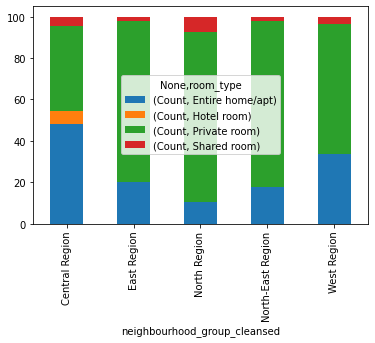

In [266]:
data_pct.unstack().plot(kind='bar', stacked=True)

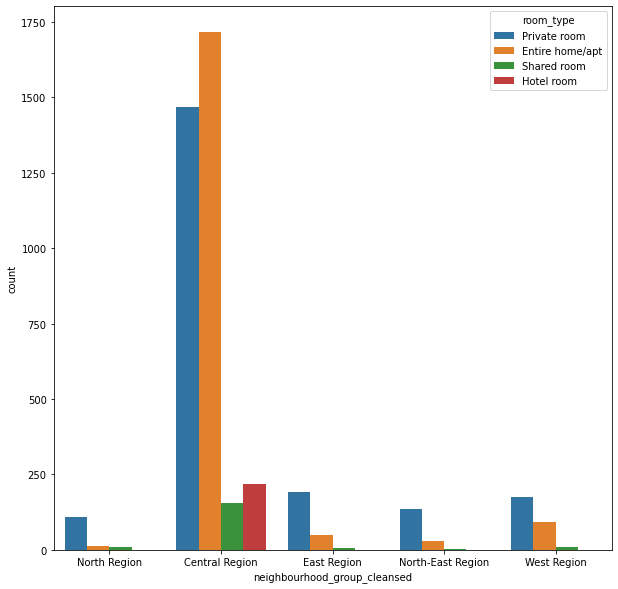

In [240]:
fig, ax = plt.subplots(figsize=(10, 10))
g = sns.countplot(data=df_dict['listings'], x='neighbourhood_group_cleansed', hue='room_type', )

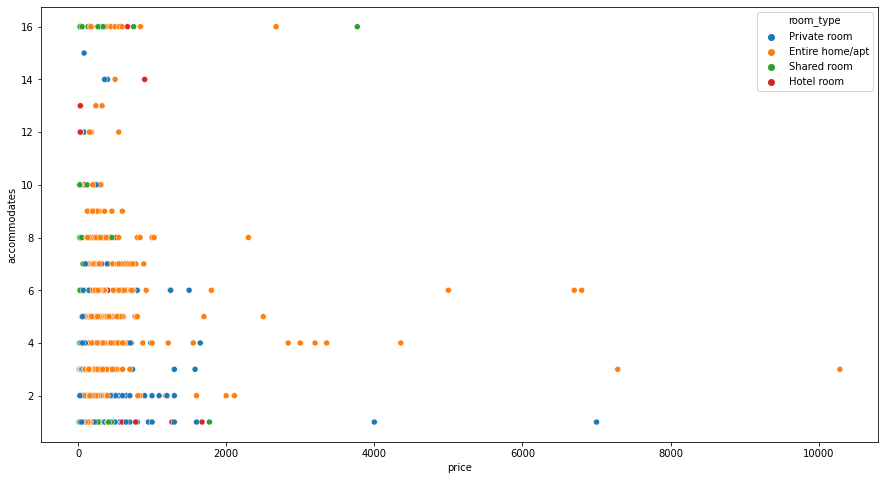

In [235]:
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.scatterplot(data=df_dict['listings'], y='accommodates', x='price', hue='room_type')

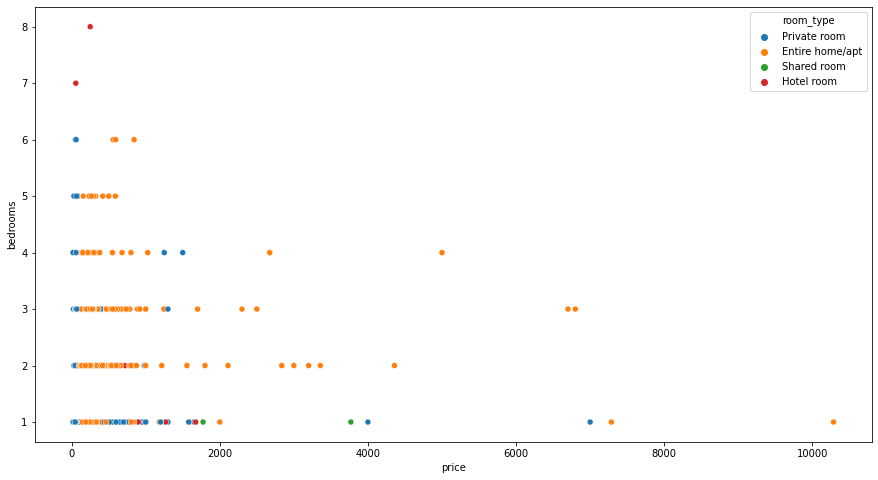

In [236]:
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.scatterplot(data=df_dict['listings'], y='bedrooms', x='price', hue='room_type')

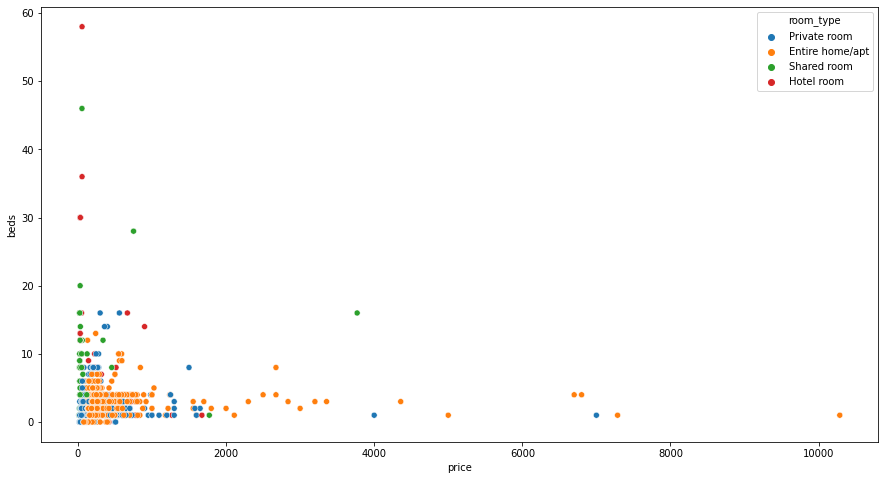

In [237]:
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.scatterplot(data=df_dict['listings'], y='beds', x='price', hue='room_type')